In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [3]:
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


#### Choosing column 'open' for predicition

In [5]:
train = train_df.loc[:,["Open"]].values
train.shape

(1258, 1)

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
train_scaled = scaler.fit_transform(train)

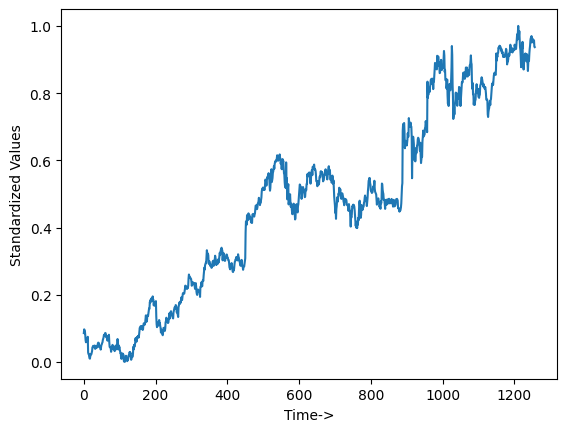

In [8]:
plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

### Create data structure to train model  
Taking reference of past 60 days to predict future stock price  
x_train will have data of 60 days prior to current date and y_train will have price on current date

In [9]:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [11]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

### Build model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout

In [13]:
model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

In [14]:
model.fit(x_train,y_train,epochs=200,batch_size=30,validation_split=0.05, verbose = 1)

Epoch 1/200
38/38 [==============================] - 9s 127ms/step - loss: 0.4703 - val_loss: 0.0068
Epoch 2/200
38/38 [==============================] - 4s 98ms/step - loss: 0.2760 - val_loss: 0.0100
Epoch 3/200
38/38 [==============================] - 4s 96ms/step - loss: 0.1828 - val_loss: 0.0177
Epoch 4/200
38/38 [==============================] - 4s 98ms/step - loss: 0.1391 - val_loss: 0.0020
Epoch 5/200
38/38 [==============================] - 4s 98ms/step - loss: 0.1133 - val_loss: 0.0029
Epoch 6/200
38/38 [==============================] - 4s 98ms/step - loss: 0.0981 - val_loss: 0.0369
Epoch 7/200
38/38 [==============================] - 4s 97ms/step - loss: 0.0818 - val_loss: 0.0079
Epoch 8/200
38/38 [==============================] - 4s 96ms/step - loss: 0.0644 - val_loss: 0.0286
Epoch 9/200
38/38 [==============================] - 4s 97ms/step - loss: 0.0535 - val_loss: 0.0122
Epoch 10/200
38/38 [==============================] - 4s 95ms/step - loss: 0.0482 - val_loss: 0.033

38/38 [==============================] - 2s 64ms/step - loss: 0.0013 - val_loss: 5.5034e-04
Epoch 160/200
38/38 [==============================] - 3s 69ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 161/200
38/38 [==============================] - 2s 63ms/step - loss: 0.0011 - val_loss: 6.3492e-04
Epoch 162/200
38/38 [==============================] - 3s 67ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 163/200
38/38 [==============================] - 3s 73ms/step - loss: 0.0012 - val_loss: 5.1306e-04
Epoch 164/200
38/38 [==============================] - 3s 67ms/step - loss: 0.0013 - val_loss: 5.5433e-04
Epoch 165/200
38/38 [==============================] - 2s 57ms/step - loss: 0.0012 - val_loss: 8.2306e-04
Epoch 166/200
38/38 [==============================] - 3s 65ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 167/200
38/38 [==============================] - 767s 21s/step - loss: 0.0013 - val_loss: 0.0016
Epoch 168/200
38/38 [==============================] - 3s 66ms/step - loss:

### Prepare test dataset

In [15]:
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [16]:
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(80,)

In [17]:
test_input = test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [18]:
test_scaled = scaler.transform(test_input)

#### Create test data set

In [19]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [20]:
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [21]:
y_test = test_df.loc[:,"Open"].values

Model Prediction

In [22]:
y_pred = model.predict(x_test)

1/1 [==============================] - 1s 536ms/step


In [23]:
y_pred = scaler.inverse_transform(y_pred)

In [25]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 12.219014843329726


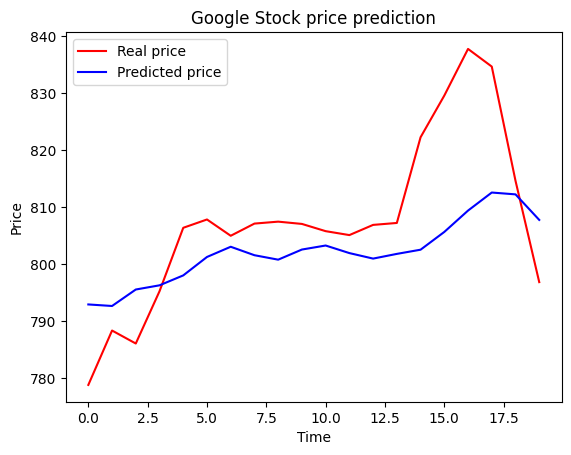

In [26]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()